In [1]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Loading Data
df = pd.read_excel('WA_Fn-UseC_-Telco-Customer-Churn.xlsx')

<IPython.core.display.Javascript object>

In [3]:
# Getting details about features
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Getting details about data --> no of null values, dtypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [6]:
# Getting Total Number of Unique values in all features
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
# checking unique values of the features
for i in df.columns:
    print('---------' + str(i).upper() + '-----------')
    print(df[i].unique())
    print()

---------CUSTOMERID-----------
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

---------GENDER-----------
['Female' 'Male']

---------SENIORCITIZEN-----------
[0 1]

---------PARTNER-----------
['Yes' 'No']

---------DEPENDENTS-----------
['No' 'Yes']

---------TENURE-----------
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

---------PHONESERVICE-----------
['No' 'Yes']

---------MULTIPLELINES-----------
['No phone service' 'No' 'Yes']

---------INTERNETSERVICE-----------
['DSL' 'Fiber optic' 'No']

---------ONLINESECURITY-----------
['No' 'Yes' 'No internet service']

---------ONLINEBACKUP-----------
['Yes' 'No' 'No internet service']

---------DEVICEPROTECTION-----------
['No' 'Yes' 'No internet service']

---------TECHSUPPORT-----------
['No' 'Yes' 'No internet service']

In [8]:
# checking null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# Senior citizenship feature is dichotomous, but it is in the form of int.
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [10]:
#Converting dtype of totalcharges into int|float
df['TotalCharges'].isin([' ']).sum()

11

In [11]:
# filling the space with '0'
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0')

In [12]:
# verified there is no space
df['TotalCharges'].isin([' ']).sum()

0

In [13]:
# Total charges in the form of object, but having 6531 values which should be continuous, so have to change the dtype.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

<IPython.core.display.Javascript object>

In [14]:
# dropping unique feature
df.drop('customerID', axis=1, inplace = True)

In [15]:
# Seperating numerical and categorical features
df_num = df.select_dtypes(np.number)
df_cat = df.select_dtypes('object')

<IPython.core.display.Javascript object>

In [16]:
# dropping target variable from the categorical column
df_cat.drop('Churn', axis=1, inplace = True)

In [17]:
len(df_num.columns)

3

In [18]:
len(df_cat.columns)

16

In [19]:
# target variable
target = df['Churn']

In [20]:
# EDA

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Churn', ylabel='count'>

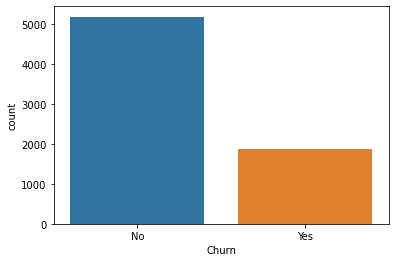

In [21]:
# visualizing Target variable
sns.countplot(df['Churn'])

In [22]:
# checking imbalance in dataset
yes_per = (df[df['Churn'] == 'Yes'].shape[0])/df.shape[0] * 100
no_per = (df[df['Churn'] == 'No'].shape[0])/df.shape[0] * 100
print('Yes:', yes_per,'%')   
print('No:', no_per,'%')

Yes: 26.536987079369588 %
No: 73.4630129206304 %


## comments:
-- we can see the data is imbalanced.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

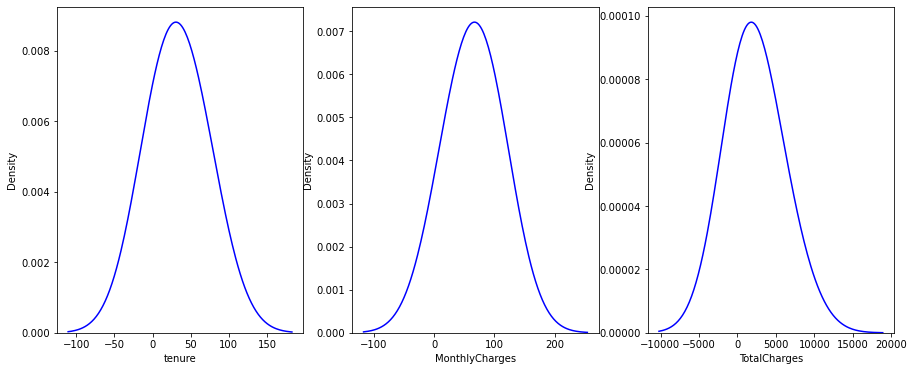

In [23]:
# Visualizing numerical features

# Checking normality
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
for i,j in zip(df_num.columns, ax.flatten()):
    sns.kdeplot(df_num[i], bw = 1.5, ax = j , color = 'b' )
plt.show()

## comments:
-- All features are not normally distributed.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

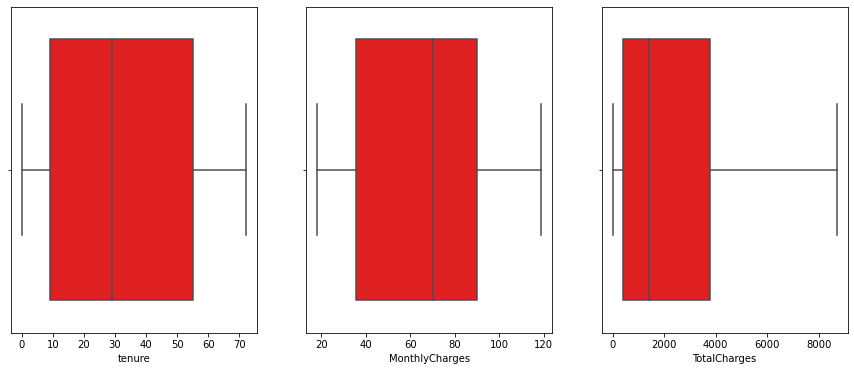

In [24]:
# Checking outliers
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
for i,j in zip(df_num.columns, ax.flatten()):
    sns.boxplot(df_num[i], ax = j , color = 'r' )
plt.show() 

## comments:
-- No outliers in any features.

<IPython.core.display.Javascript object>

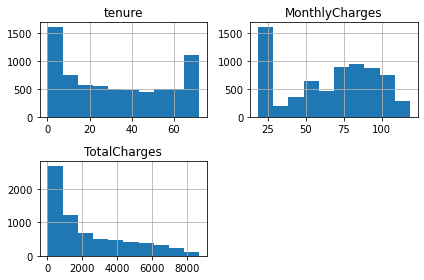

In [25]:
# checking distributions
df.hist()
plt.tight_layout()

## comments:
-- All 3 features are Not distributed normally.

In [26]:
# checking skewness
df_num.skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963235
dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

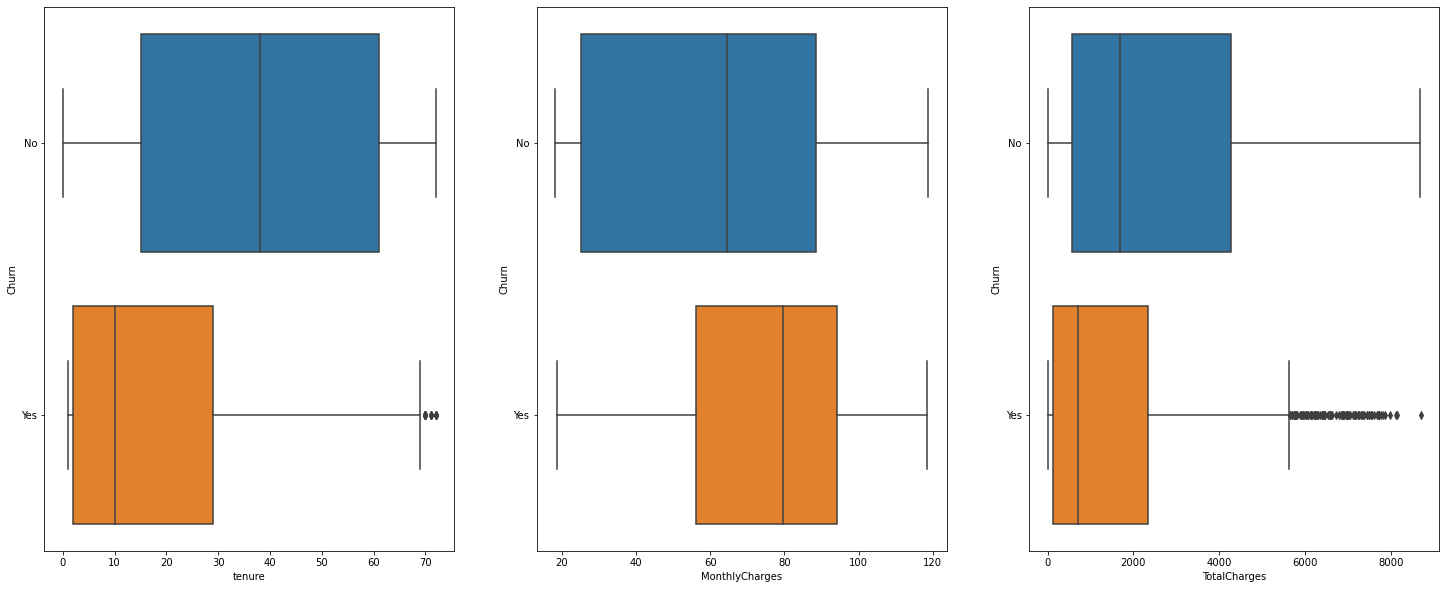

In [27]:
# BIVARIATE
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (25,10))
for i,j in zip(df_num.columns, ax.flatten()):
    sns.boxplot(x= df_num[i], y= df['Churn'],  ax = j  )
plt.show()

## Comments:

In [28]:
# Visualizing categorical feature

In [29]:
df_cat.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

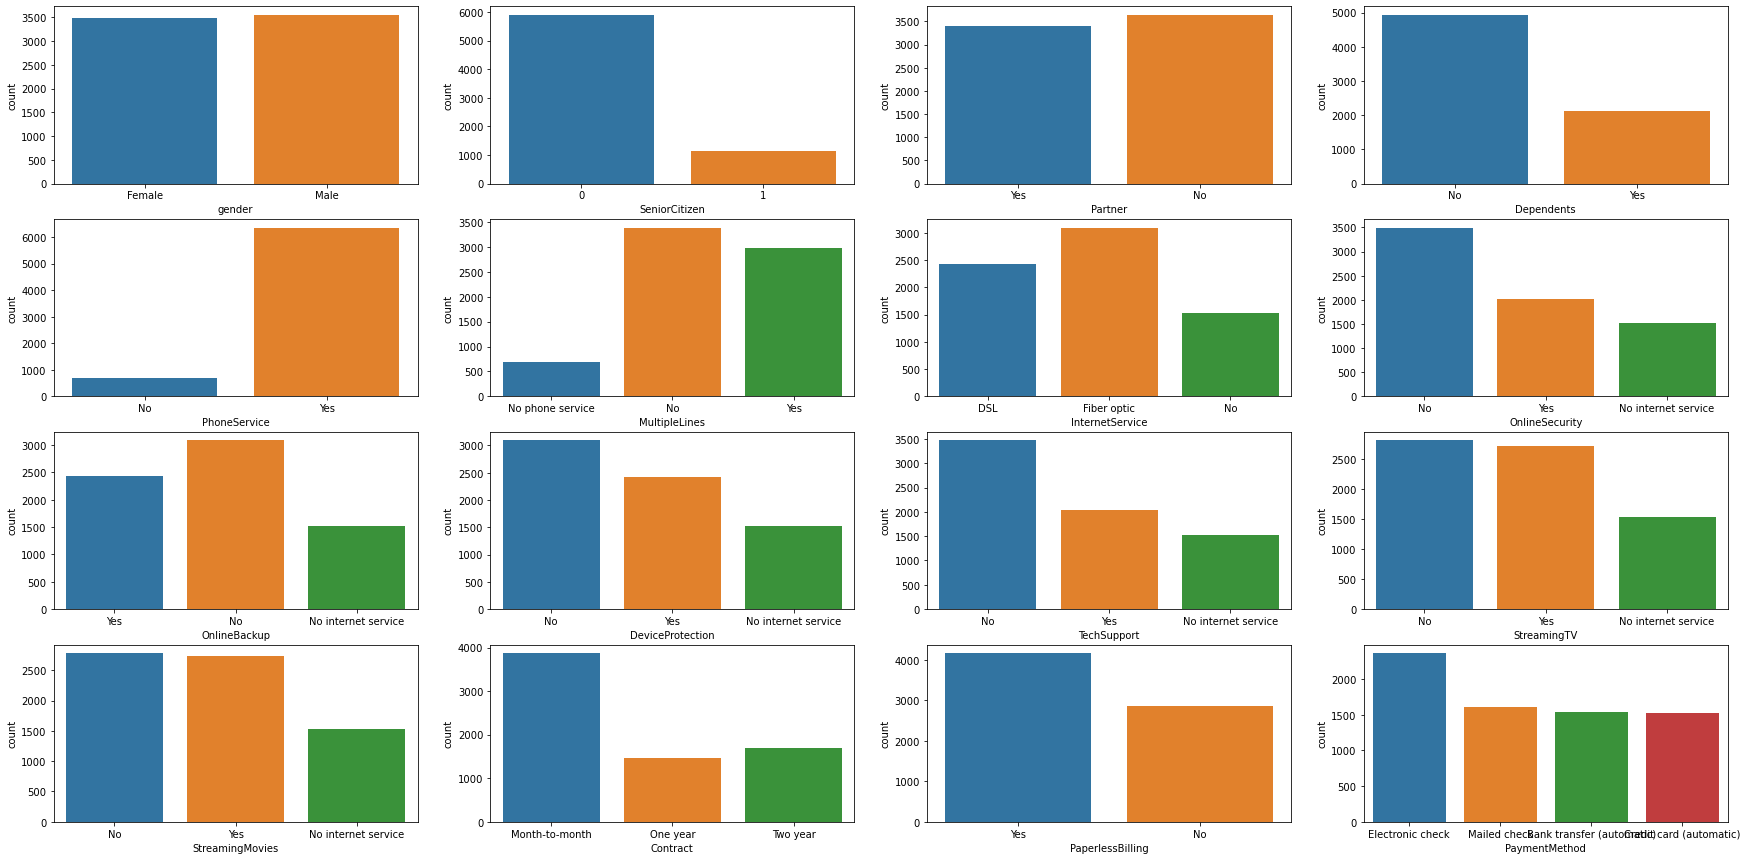

In [30]:
# Knowing which object having maximum number of occurence
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize = (30,15))
for i,j in zip(df_cat.columns, ax.flatten()):
    sns.countplot(df_cat[i], ax = j  )
plt.show()

<IPython.core.display.Javascript object>

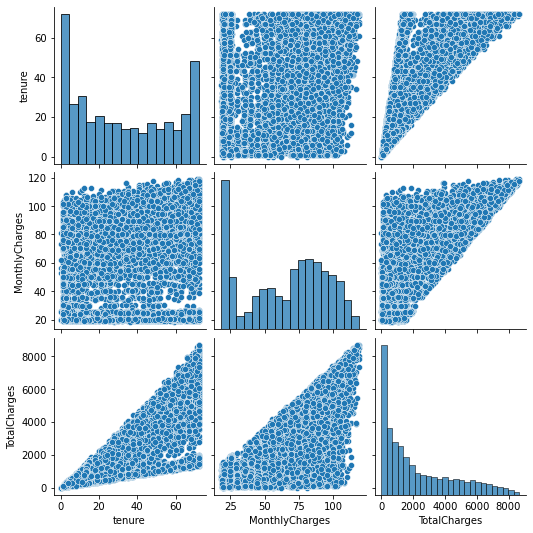

In [31]:
# Multivariate
cols = df_num.columns
sns.pairplot(df_num)

In [32]:
len(df_cat.columns)

16

In [33]:
# Dummy coding

df_cat_dummy = pd.get_dummies(df_cat, drop_first = True)

<IPython.core.display.Javascript object>

In [34]:
df_cat_dummy.head()

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [35]:
X = pd.concat([df_cat_dummy, df_num], axis = 1)
X.head()

<IPython.core.display.Javascript object>

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,29.85,29.85
1,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,34,56.95,1889.50
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,2,53.85,108.15
3,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,45,42.30,1840.75
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,2,70.70,151.65


In [36]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
fitt = StandardScaler()
X = fitt.fit_transform(X)

In [37]:
X[0:2]

array([[-1.00955867, -0.43991649,  1.03453023, -0.65401193, -3.05401039,
         3.05401039, -0.85417615, -0.88565976, -0.52592737, -0.52592737,
        -0.63393298, -0.52592737,  1.3782406 , -0.52592737, -0.72396752,
        -0.52592737, -0.63943864, -0.52592737, -0.79013171, -0.52592737,
        -0.79607014, -0.51424938, -0.56297505,  0.8297975 , -0.52504733,
         1.40641839, -0.54480692, -1.27744458, -1.16032292, -0.99261052],
       [ 0.99053183, -0.43991649, -0.96662231, -0.65401193,  0.32743831,
        -0.32743831, -0.85417615, -0.88565976, -0.52592737, -0.52592737,
         1.57745383, -0.52592737, -0.72556272, -0.52592737,  1.38127743,
        -0.52592737, -0.63943864, -0.52592737, -0.79013171, -0.52592737,
        -0.79607014,  1.94458183, -0.56297505, -1.20511329, -0.52504733,
        -0.71102597,  1.83551265,  0.06632742, -0.25962894, -0.17216471]])

In [38]:
# Label encoding on target variable
from sklearn.preprocessing import LabelEncoder
fit1 = LabelEncoder()
df['Churn'] = fit1.fit_transform(df['Churn'])

In [39]:
df['Churn'].unique()

array([0, 1])

In [40]:
y = df['Churn']

In [41]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



from sklearn import metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

ModuleNotFoundError: No module named 'mlxtend'

In [42]:
# Splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)


# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)

X_train  (4930, 30)
X_test  (2113, 30)
y_train  (4930,)
y_test  (2113,)


In [43]:
#Building models and evaluating metrics

column = ['Model_name', 'Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score', 'Kappa Score', 'f1-score', "confusion matrix", 'Sensitivity', 'Specificity']

result_tab = pd.DataFrame(columns=column)

models=[LogisticRegression(), AdaBoostClassifier(), RandomForestClassifier(), GaussianNB(), KNeighborsClassifier(), SVC(probability=True)]

def func(model_name):
    for i in models:
        
        global result_tab
        
        print('----------',str(i).upper(),'--------')
        print()
        
        method=i
        method.fit(X_train,y_train)
        y_pred = method.predict(X_test)
       
        
        
        pred_prob1 = method.predict_proba(X_test)
        
        
        fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
        confusion_mat=confusion_matrix(y_pred,y_test)
        print('Confusion Matrix \n', confusion_mat)
        
        print("classification report:   ",classification_report(y_pred,y_test))
        print('PPV: ', 100*confusion_mat[0][0]/(confusion_mat[0][0]+confusion_mat[1][0]))
        print('NPV: ', 100*confusion_mat[1][1]/(confusion_mat[1][1]+confusion_mat[0][1]))

        plt.plot(fpr1, tpr1, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False positve rate (1- Specificity)')
        plt.ylabel('True positive rate (Sensitivity)')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()
        print()
        
        modd=pd.Series({'Model_name':str(model_name)[0:10],
                        'Model': str(i),
                    'AUC Score' : roc_auc_score(y_test, pred_prob1[:,1]),
                    'Precision Score': metrics.precision_score(y_test, y_pred),
                    'Recall Score': metrics.recall_score(y_test, y_pred),
                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                    'f1-score': f1_score(y_test, y_pred),
                    "confusion matrix":confusion_matrix(y_pred,y_test),
                    'Sensitivity':100*confusion_mat[0][0]/(confusion_mat[0][0]+confusion_mat[0][1]),
                    'Specificity': 100*confusion_mat[1][1]/(confusion_mat[1][1]+confusion_mat[1][0])})
        
        result_tab = result_tab.append(modd,ignore_index=True)
        
    return result_tab

<IPython.core.display.Javascript object>

---------- LOGISTICREGRESSION() --------

Confusion Matrix 
 [[1387  244]
 [ 169  313]]
classification report:                  precision    recall  f1-score   support

           0       0.89      0.85      0.87      1631
           1       0.56      0.65      0.60       482

    accuracy                           0.80      2113
   macro avg       0.73      0.75      0.74      2113
weighted avg       0.82      0.80      0.81      2113

PPV:  89.1388174807198
NPV:  56.193895870736085


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

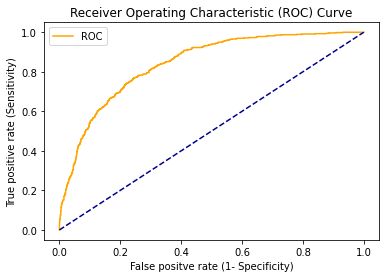

<IPython.core.display.Javascript object>

---------- ADABOOSTCLASSIFIER() --------

Confusion Matrix 
 [[1384  248]
 [ 172  309]]
classification report:                  precision    recall  f1-score   support

           0       0.89      0.85      0.87      1632
           1       0.55      0.64      0.60       481

    accuracy                           0.80      2113
   macro avg       0.72      0.75      0.73      2113
weighted avg       0.81      0.80      0.81      2113

PPV:  88.94601542416453
NPV:  55.47576301615799


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

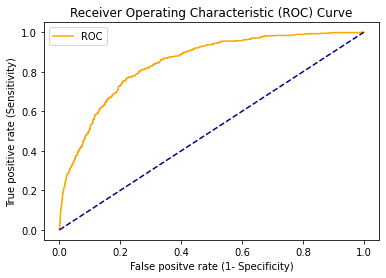

<IPython.core.display.Javascript object>

---------- RANDOMFORESTCLASSIFIER() --------

Confusion Matrix 
 [[1392  280]
 [ 164  277]]
classification report:                  precision    recall  f1-score   support

           0       0.89      0.83      0.86      1672
           1       0.50      0.63      0.56       441

    accuracy                           0.79      2113
   macro avg       0.70      0.73      0.71      2113
weighted avg       0.81      0.79      0.80      2113

PPV:  89.46015424164524
NPV:  49.730700179533216


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

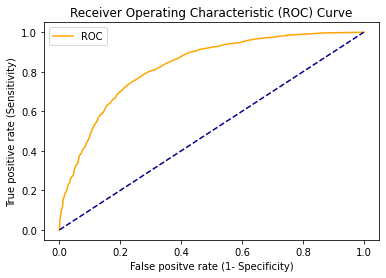

<IPython.core.display.Javascript object>

---------- GAUSSIANNB() --------

Confusion Matrix 
 [[904  80]
 [652 477]]
classification report:                  precision    recall  f1-score   support

           0       0.58      0.92      0.71       984
           1       0.86      0.42      0.57      1129

    accuracy                           0.65      2113
   macro avg       0.72      0.67      0.64      2113
weighted avg       0.73      0.65      0.63      2113

PPV:  58.09768637532134
NPV:  85.63734290843806


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

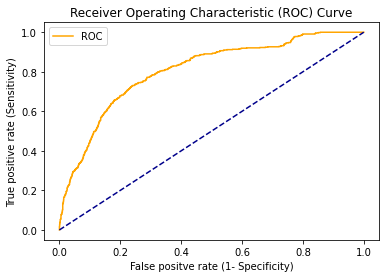

<IPython.core.display.Javascript object>

---------- KNEIGHBORSCLASSIFIER() --------

Confusion Matrix 
 [[1299  274]
 [ 257  283]]
classification report:                  precision    recall  f1-score   support

           0       0.83      0.83      0.83      1573
           1       0.51      0.52      0.52       540

    accuracy                           0.75      2113
   macro avg       0.67      0.67      0.67      2113
weighted avg       0.75      0.75      0.75      2113

PPV:  83.48329048843188
NPV:  50.80789946140036


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

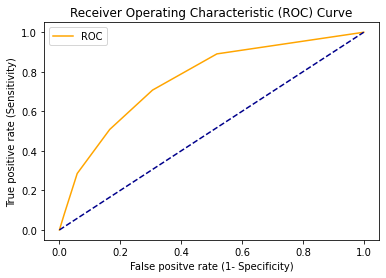

<IPython.core.display.Javascript object>

---------- SVC(PROBABILITY=TRUE) --------

Confusion Matrix 
 [[1410  283]
 [ 146  274]]
classification report:                  precision    recall  f1-score   support

           0       0.91      0.83      0.87      1693
           1       0.49      0.65      0.56       420

    accuracy                           0.80      2113
   macro avg       0.70      0.74      0.71      2113
weighted avg       0.82      0.80      0.81      2113

PPV:  90.61696658097686
NPV:  49.19210053859964


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

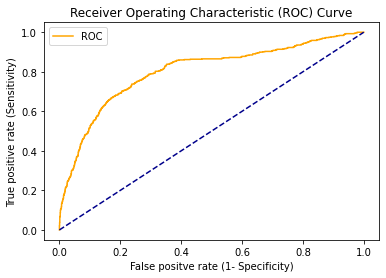

<IPython.core.display.Javascript object>

,Model_name,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,confusion matrix,Sensitivity,Specificity
0,BASE,LogisticRegression(),0.841240,0.649378,0.561939,0.804543,0.473807,0.602502,"[[1387, 244], [169, 313]]",85.039853,64.937759
1,BASE,AdaBoostClassifier(),0.844478,0.642412,0.554758,0.801230,0.464566,0.595376,"[[1384, 248], [172, 309]]",84.803922,64.241164
2,BASE,RandomForestClassifier(),0.828501,0.628118,0.497307,0.789872,0.419986,0.555110,"[[1392, 280], [164, 277]]",83.253589,62.811791
3,BASE,GaussianNB(),0.805393,0.422498,0.856373,0.653573,0.328919,0.565836,"[[904, 80], [652, 477]]",91.869919,42.249779
4,BASE,KNeighborsClassifier(),0.761422,0.524074,0.508079,0.748699,0.346305,0.515953,"[[1299, 274], [257, 283]]",82.581055,52.407407
5,BASE,SVC(probability=True),0.802063,0.652381,0.491921,0.796971,0.432217,0.560901,"[[1410, 283], [146, 274]]",83.284111,65.238095


In [44]:
func(' BASE ')

In [45]:
# Handling imbalance in dataset
from imblearn.over_sampling import SMOTE
fit2 = SMOTE()
x_re, y_re = fit2.fit_resample(X, y)

In [46]:
len(x_re), len(y_re)

(10348, 10348)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x_re, y_re, test_size = 0.30, random_state=10)


---------- LOGISTICREGRESSION() --------

Confusion Matrix 
 [[1158  270]
 [ 423 1254]]
classification report:                  precision    recall  f1-score   support

           0       0.73      0.81      0.77      1428
           1       0.82      0.75      0.78      1677

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105

PPV:  73.24478178368122
NPV:  82.28346456692914


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

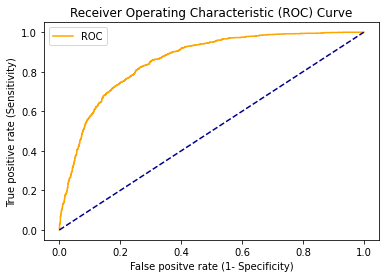

<IPython.core.display.Javascript object>

---------- ADABOOSTCLASSIFIER() --------

Confusion Matrix 
 [[1220  212]
 [ 361 1312]]
classification report:                  precision    recall  f1-score   support

           0       0.77      0.85      0.81      1432
           1       0.86      0.78      0.82      1673

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105

PPV:  77.1663504111322
NPV:  86.08923884514435


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

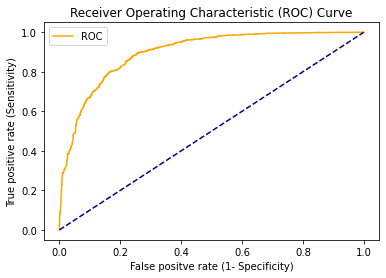

<IPython.core.display.Javascript object>

---------- RANDOMFORESTCLASSIFIER() --------

Confusion Matrix 
 [[1334  220]
 [ 247 1304]]
classification report:                  precision    recall  f1-score   support

           0       0.84      0.86      0.85      1554
           1       0.86      0.84      0.85      1551

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105

PPV:  84.37697659709045
NPV:  85.56430446194226


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

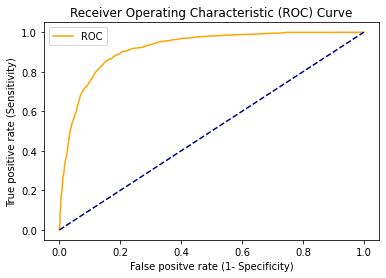

<IPython.core.display.Javascript object>

---------- GAUSSIANNB() --------

Confusion Matrix 
 [[ 954  191]
 [ 627 1333]]
classification report:                  precision    recall  f1-score   support

           0       0.60      0.83      0.70      1145
           1       0.87      0.68      0.77      1960

    accuracy                           0.74      3105
   macro avg       0.74      0.76      0.73      3105
weighted avg       0.77      0.74      0.74      3105

PPV:  60.3415559772296
NPV:  87.46719160104986


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

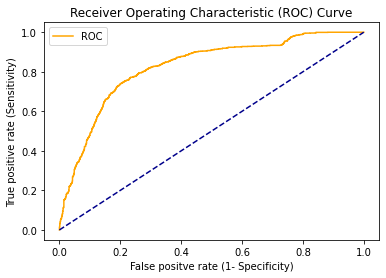

<IPython.core.display.Javascript object>

---------- KNEIGHBORSCLASSIFIER() --------

Confusion Matrix 
 [[1046  153]
 [ 535 1371]]
classification report:                  precision    recall  f1-score   support

           0       0.66      0.87      0.75      1199
           1       0.90      0.72      0.80      1906

    accuracy                           0.78      3105
   macro avg       0.78      0.80      0.78      3105
weighted avg       0.81      0.78      0.78      3105

PPV:  66.1606578115117
NPV:  89.96062992125984


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

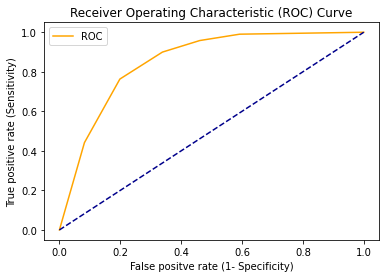

<IPython.core.display.Javascript object>

---------- SVC(PROBABILITY=TRUE) --------

Confusion Matrix 
 [[1203  236]
 [ 378 1288]]
classification report:                  precision    recall  f1-score   support

           0       0.76      0.84      0.80      1439
           1       0.85      0.77      0.81      1666

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.81      0.80      0.80      3105

PPV:  76.0910815939279
NPV:  84.51443569553805


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

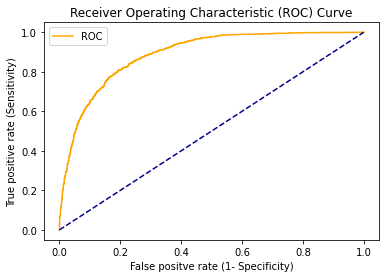

<IPython.core.display.Javascript object>

,Model_name,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,confusion matrix,Sensitivity,Specificity
0,BASE,LogisticRegression(),0.841240,0.649378,0.561939,0.804543,0.473807,0.602502,"[[1387, 244], [169, 313]]",85.039853,64.937759
1,BASE,AdaBoostClassifier(),0.844478,0.642412,0.554758,0.801230,0.464566,0.595376,"[[1384, 248], [172, 309]]",84.803922,64.241164
2,BASE,RandomForestClassifier(),0.828501,0.628118,0.497307,0.789872,0.419986,0.555110,"[[1392, 280], [164, 277]]",83.253589,62.811791
3,BASE,GaussianNB(),0.805393,0.422498,0.856373,0.653573,0.328919,0.565836,"[[904, 80], [652, 477]]",91.869919,42.249779
4,BASE,KNeighborsClassifier(),0.761422,0.524074,0.508079,0.748699,0.346305,0.515953,"[[1299, 274], [257, 283]]",82.581055,52.407407
5,BASE,SVC(probability=True),0.802063,0.652381,0.491921,0.796971,0.432217,0.560901,"[[1410, 283], [146, 274]]",83.284111,65.238095
6,SMOTE,LogisticRegression(),0.856485,0.747764,0.822835,0.776812,0.554279,0.783505,"[[1158, 270], [423, 1254]]",81.092437,74.776386
7,SMOTE,AdaBoostClassifier(),0.897519,0.784220,0.860892,0.815459,0.631443,0.820769,"[[1220, 212], [361, 1312]]",85.195531,78.421996
8,SMOTE,RandomForestClassifier(),0.918842,0.840748,0.855643,0.849597,0.699190,0.848130,"[[1334, 220], [247, 1304]]",85.842986,84.074790
9,SMOTE,GaussianNB(),0.824671,0.680102,0.874672,0.736554,0.475635,0.765212,"[[954, 191], [627, 1333]]",83.318777,68.010204


In [48]:
func('SMOTE')

In [49]:
randddd = RandomForestClassifier()
randddd.fit(X_train , y_train)

RandomForestClassifier()

In [50]:
y_pred = randddd.predict(X_test)

In [51]:
confusion_matrix(y_pred, y_test)

array([[1320,  226],
       [ 261, 1298]], dtype=int64)